In [1]:
import pandas as pd

In [6]:
data = pd.read_table('examples/brain_size.txt', sep=';', na_values=".")

In [7]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [2]:
import numpy as np

In [9]:
t = np.linspace(-6,6,20)

In [11]:
sin_t = np.sin(t)
cos_t = np.cos(t)

In [13]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,cos,sin,t
0,0.960170,0.279415,-6.000000
1,0.609977,0.792419,-5.368421
2,0.024451,0.999701,-4.736842
3,-0.570509,0.821291,-4.105263
4,-0.945363,0.326021,-3.473684
5,-0.955488,-0.295030,-2.842105
6,-0.596979,-0.802257,-2.210526
7,-0.008151,-0.999967,-1.578947
8,0.583822,-0.811882,-0.947368
9,0.950551,-0.310567,-0.315789


In [15]:
data.shape

(5, 8)

In [16]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [17]:
data['Gender']

0    Female
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object

In [29]:
data[data['Gender'] == 'Female']['VIQ'].mean()

132.0

In [30]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 132.0)
('Male', 134.0)


In [35]:
 groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,3.0,135.000000,132.0,129.0,132.5,64.750000,884238.5
Male,3.0,137.333333,134.0,134.0,157.5,71.533333,1001637.0


In [3]:
from pandas.tools import plotting

f:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B73BDD0>,
      dtype=object)

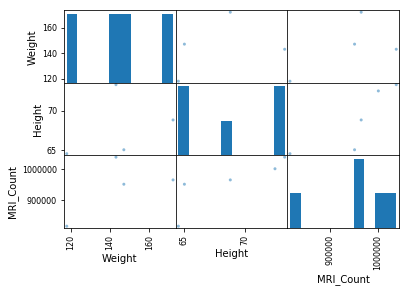

In [42]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

## Hypothesis testing: comparing two groups

In [4]:
from scipy import stats

### 1-sample t-test: testing the value of a population mean

In [79]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=29.53444067255562, pvalue=7.825719971719742e-06)

### 2-sample t-test:  testing for difference across populations

In [81]:
female_vip = data[data['Gender'] == 'Female']['VIQ']
male_vip = data[data['Gender'] == 'Male']['VIQ']

In [82]:
stats.ttest_ind(female_vip,male_vip)

Ttest_indResult(statistic=-0.18926408936295352, pvalue=0.8619667118907584)

### Paired tests: repeated measurements on the same indivuals

In [83]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.8669214468630118, pvalue=0.4112315956435204)

In [84]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=0.9898267954648649, pvalue=0.378290823976541)

In [85]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=0.9898267954648649, pvalue=0.378290823976541)

##  Linear models, multiple factors, and analysis of variance

In [5]:
x = np.linspace(-5, 5, 20)

In [6]:
np.random.seed(1)

In [14]:
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

In [16]:
data = pd.DataFrame({'x': x, 'y': y})

In [17]:
data

,x,y
0,-5.000000,-24.399565
1,-4.473684,-19.110765
2,-3.947368,-20.353539
3,-3.421053,-15.094303
4,-2.894737,-11.352950
5,-2.368421,-16.507740
6,-1.842105,-5.947421
7,-1.315789,-5.341006
8,-0.789474,-5.358444
9,-0.263158,-2.186050


In [18]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 06 Jun 2018   Prob (F-statistic):           1.14e-10
Time:                        09:03:17   Log-Likelihood:                -48.827
No. Observations:                  20   AIC:                             101.7
Df Residuals:                      18   BIC:                             103.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7896      0.655     -8.836      0.0

In [22]:
data = pd.read_table('examples/brain_size.txt', sep = ';', na_values=".")

In [26]:
model = ols("VIQ ~ Gender + 1", data).fit()

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.318
Method:                 Least Squares   F-statistic:                   0.03582
Date:                Wed, 06 Jun 2018   Prob (F-statistic):              0.862
Time:                        09:28:49   Log-Likelihood:                -18.062
No. Observations:                   5   AIC:                             40.12
Df Residuals:                       3   BIC:                             39.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        132.0000      8.185     16.

f:\python\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [33]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)

    iq  type
0  133  fsiq
1  140  fsiq
2  139  fsiq
3  133  fsiq
4  137  fsiq
0  124   piq
1  124   piq
2  150   piq
3  128   piq
4  134   piq


In [35]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.7516
Date:                Wed, 06 Jun 2018   Prob (F-statistic):              0.411
Time:                        09:30:40   Log-Likelihood:                -33.899
No. Observations:                  10   AIC:                             71.80
Df Residuals:                       8   BIC:                             72.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     136.4000      3.589     38.006      

f:\python\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [36]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.8669214468630118, pvalue=0.4112315956435204)

In [1]:
from statsmodels.tsa.stattools import adfuller as ADF

In [2]:
import numpy as np

In [3]:
ADF(np.random.rand(100))

(-5.6769810427926615,
 8.659547632999825e-07,
 2,
 97,
 {'1%': -3.4996365338407074,
  '5%': -2.8918307730370025,
  '10%': -2.5829283377617176},
 33.72178455645789)